In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
# dirname = 'data/competition-output/phase1-final/rcc-03/raw_results/'
# filename = 'data_set_citations.json'

dirname = 'data/'
filename = 'data_set_citations.json'

citations_all =pd.read_json(dirname+filename)
citations_all = citations_all[['data_set_id','publication_id','score']]

In [3]:
citations_all.head()

,data_set_id,publication_id,score
0,311,105,1
1,312,105,1
2,321,109,1
3,307,109,1
4,322,109,1


In [4]:
citations_all['data_set_id'] = ['data_'+str(i) for i in citations_all['data_set_id']]
citations_all['publication_id'] = ['pub_'+str(i) for i in citations_all['publication_id']]



citations_all.head()

,data_set_id,publication_id,score
0,data_311,pub_105,1
1,data_312,pub_105,1
2,data_321,pub_109,1
3,data_307,pub_109,1
4,data_322,pub_109,1


In [5]:
authors = pd.read_csv('data/Full_mag&publications_Authors.csv', dtype=object )
publications = pd.read_csv('data/publications.csv', dtype=object)
doi = pd.read_csv('data/Full_mag&publications_doi.csv', dtype=object)
authors_doi = pd.read_csv('data/Full_mag&publications_doi.csv', dtype=object)

In [6]:
authors.head()

,PaperId,AuthorId,DisplayName,LastKnownAffiliationId,PaperCount
0,2104865572,39367150,Bruce H. R. Wolffenbuttel,1334415907,546
1,2139458019,141843689,Sylvie Démurger,203339264,79
2,2111178213,315081531,Paul M. Guinther,888729015,6
3,2271983574,345889393,Casey A. Klofstad,145608581,47
4,2310476556,430514087,Julie Byles,78757542,436


In [7]:
publications.head()

,pdf_file_name,pub_date,publication_id,text_file_name,title,unique_identifier
0,105.pdf,1969-01-01,105,105.txt,Cheap Talk? Financial Sanctions and Non-Financ...,bbk-4
1,109.pdf,1969-01-01,109,109.txt,Banks' Trading after the Lehman Crisis - The R...,bbk-8
2,110.pdf,1969-01-01,110,110.txt,A Comprehensive View on Risk Reporting: Eviden...,bbk-9
3,111.pdf,1969-01-01,111,111.txt,The Financial Market Effects of the ECB's Asse...,bbk-10
4,115.pdf,1969-01-01,115,115.txt,Interbank Intermediation,bbk-14


In [8]:
doi.head()

,title1,PaperId,Doi
0,10.1001/archpedi.160.3.279,2137918531,10.1001/archpedi.160.3.279
1,10.1001/jama.287.9.1123,2106231056,10.1001/jama.287.9.1123
2,10.1038/ajh.2010.40,2039034380,10.1038/ajh.2010.40
3,10.1038/oby.2000.79,2029957476,10.1038/oby.2000.79
4,10.1038/oby.2009.365,2083124104,10.1038/oby.2009.365


In [9]:
authors_doi.head()

,title1,PaperId,Doi
0,10.1001/archpedi.160.3.279,2137918531,10.1001/archpedi.160.3.279
1,10.1001/jama.287.9.1123,2106231056,10.1001/jama.287.9.1123
2,10.1038/ajh.2010.40,2039034380,10.1038/ajh.2010.40
3,10.1038/oby.2000.79,2029957476,10.1038/oby.2000.79
4,10.1038/oby.2009.365,2083124104,10.1038/oby.2009.365


In [10]:
pub_doi = pd.merge(publications, doi, left_on='unique_identifier', right_on='Doi', how='inner')[['publication_id','PaperId','Doi']]

PubAuthor_pairs = pd.merge(pub_doi, authors, left_on='PaperId', right_on='PaperId', how='inner')[['publication_id','AuthorId','Doi']]


In [11]:
pub_doi.head()

,publication_id,PaperId,Doi
0,166,2143755248,10.1093/geront/36.4.464
1,167,2170243727,10.1093/geronb/56.5.S275
2,168,2171962618,10.1093/geront/39.1.59
3,169,2160690703,10.1093/geront/39.6.695
4,170,2128509884,10.1093/oxfordjournals.aje.a009387


In [12]:
PubAuthor_pairs.head()

,publication_id,AuthorId,Doi
0,166,1980535627,10.1093/geront/36.4.464
1,166,2102637265,10.1093/geront/36.4.464
2,166,2097939274,10.1093/geront/36.4.464
3,166,2474341466,10.1093/geront/36.4.464
4,167,2097939274,10.1093/geronb/56.5.S275


In [13]:
PubAuthor_pairs.publication_id = PubAuthor_pairs.publication_id.apply(lambda x: "pub_"+str(x))

In [14]:
citations_all.head()

,data_set_id,publication_id,score
0,data_311,pub_105,1
1,data_312,pub_105,1
2,data_321,pub_109,1
3,data_307,pub_109,1
4,data_322,pub_109,1


In [15]:
PubAuthor_pairs.head()

,publication_id,AuthorId,Doi
0,pub_166,1980535627,10.1093/geront/36.4.464
1,pub_166,2102637265,10.1093/geront/36.4.464
2,pub_166,2097939274,10.1093/geront/36.4.464
3,pub_166,2474341466,10.1093/geront/36.4.464
4,pub_167,2097939274,10.1093/geronb/56.5.S275


In [16]:
Author_pub_data = pd.merge(PubAuthor_pairs, citations_all, left_on = 'publication_id', right_on = 'publication_id')

In [17]:
Author_pub_data.shape

(22396, 5)

In [18]:
Author_pub_data.head()

,publication_id,AuthorId,Doi,data_set_id,score
0,pub_166,1980535627,10.1093/geront/36.4.464,data_376,1
1,pub_166,2102637265,10.1093/geront/36.4.464,data_376,1
2,pub_166,2097939274,10.1093/geront/36.4.464,data_376,1
3,pub_166,2474341466,10.1093/geront/36.4.464,data_376,1
4,pub_167,2097939274,10.1093/geronb/56.5.S275,data_377,1


In [19]:
Author_pub_data_visual= Author_pub_data.sample(frac=0.05, replace=True, random_state=1)

In [20]:
pub_author_visual = Author_pub_data_visual[['publication_id','AuthorId']]
dataset_pub_visual = Author_pub_data_visual[['publication_id','data_set_id']]

In [21]:
G = nx.Graph()
G.add_edges_from(dataset_pub_visual.values.tolist(),color='black')
G.add_edges_from(pub_author_visual.values.tolist(),color='blue')

In [22]:
randomseed = 4
pos = nx.spring_layout(G)

In [23]:
def multiassign_x_y(d, keys, values):
    for k, v in zip(keys, values):
        d[k][0] = v 
        d[k][1] = d[k][1]*10

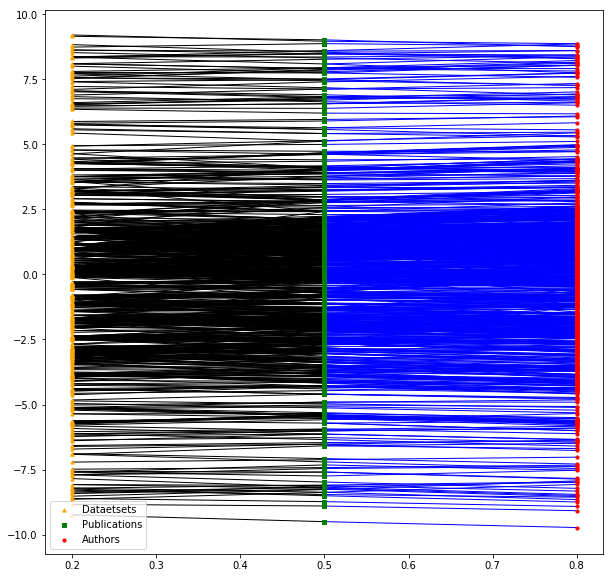

In [24]:
from matplotlib.patches import ConnectionStyle
plt.figure(figsize=(10,10))

dataset_nodes = set(dataset_pub_visual.data_set_id)
pub_nodes = set(dataset_pub_visual.publication_id)
author_nodes = set(pub_author_visual.AuthorId)

dataset_nodes_list = list(dataset_nodes)
pub_nodes_list = list(pub_nodes)
author_list = list(author_nodes)

multiassign_x_y(pos,dataset_nodes_list,[0.2]*len(dataset_nodes_list))
multiassign_x_y(pos,pub_nodes_list,[0.5]*len(pub_nodes_list))
multiassign_x_y(pos,author_list,[0.8]*len(author_list))


edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
# weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_networkx_nodes(G, nodelist = dataset_nodes, node_shape = '^', node_color = 'orange',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Dataetsets')
nx.draw_networkx_nodes(G, nodelist = pub_nodes, node_shape = 's', node_color = 'green',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Publications')
nx.draw_networkx_nodes(G, nodelist = author_nodes, node_shape = 'o', node_color = 'red',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Authors')
# # nx.draw_networkx_labels(nx.Graph(label_pos), pos=label_pos)
nx.draw_networkx_edges(G, pos=pos,edge_color=colors)


plt.legend()

In [25]:
dirname = 'data/'
filename = 'data_sets.json'
df_description = pd.read_json(dirname+filename)

In [26]:
df_description.head(3)

,additional_keywords,citation,coverages,data_set_id,date,description,family_identifier,identifier_list,mention_list,methodology,name,subjects,title,unique_identifier
0,ICPSR,,,1,2016-09-20 00:00:00+00:00,This study is part of a time-series collection...,,"[{u'identifier': u'10.3886/ICPSR07213', u'name...","[ANES study, ICPSR, SRC data, Surveys conducte...",,ANES 1952 Time Series Study,"candidates,congressional elections,domestic po...",ANES 1952 Time Series Study,10.3886/ICPSR07213
1,ICPSR,,,2,2016-09-22 00:00:00+00:00,This study is part of a time-series collection...,,"[{u'identifier': u'10.3886/ICPSR07214', u'name...","[American national election studies, SRC-CPS c...",,ANES 1956 Time Series Study,"candidates,congressional elections,domestic po...",ANES 1956 Time Series Study,10.3886/ICPSR07214
2,ICPSR,,,3,2016-09-22 00:00:00+00:00,This study is part of a time-series collection...,,"[{u'identifier': u'10.3886/ICPSR07215', u'name...",[],,ANES 1958 Time Series Study,"candidates,congressional elections,domestic po...",ANES 1958 Time Series Study,10.3886/ICPSR07215


In [27]:
df_description.data_set_id = df_description.data_set_id.apply(lambda x: "data_"+str(x))
df_merged1 = dataset_pub_visual.merge(df_description, on = "data_set_id")

df_merged1 = df_merged1[['data_set_id','publication_id','description','subjects']]
df_subjects = df_merged1[['data_set_id','subjects']]
df_subjects.subjects = df_subjects.subjects.apply(lambda x: x.split(','))



In [108]:
Author_pub_data_visual.head()

,publication_id,AuthorId,Doi,data_set_id,score
235,pub_206,2132156010,10.1542/peds.99.4.e1,data_400,1
12172,pub_1743,684946389,10.1093/intqhc/mzi080,data_530,1
5192,pub_772,2268767003,10.1377/hlthaff.18.2.30,data_53,1
17289,pub_2322,2156915567,10.1001/archinternmed.2012.2749,data_608,1
10955,pub_1616,2892825533,10.1093/aje/kwq064,data_513,1


In [28]:
subjects_list = []
keywords_nodes = set()
for idx,subjects in enumerate(df_subjects.subjects):
    for i in subjects:
        s = i.split(' ')
        subjects_list.append((df_subjects.data_set_id[idx], s[0]))
        keywords_nodes = keywords_nodes|set([s[0]])

G.add_edges_from(subjects_list,color='yellow')
pos = nx.spring_layout(G)

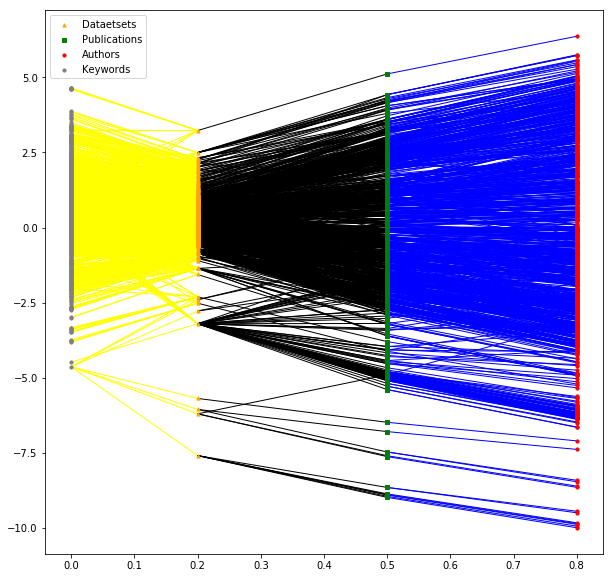

In [29]:
dataset_nodes = set(dataset_pub_visual.data_set_id)
pub_nodes = set(dataset_pub_visual.publication_id)
author_nodes  = set(pub_author_visual.AuthorId)

dataset_nodes_list = list(dataset_nodes)
pub_nodes_list = list(pub_nodes)
author_nodes_list = list(author_nodes)
keywords_nodes_list = list(keywords_nodes)

multiassign_x_y(pos,dataset_nodes_list,[0.2]*len(dataset_nodes_list))
multiassign_x_y(pos,pub_nodes_list,[0.5]*len(pub_nodes_list))
multiassign_x_y(pos,author_nodes_list,[0.8]*len(author_nodes_list))
multiassign_x_y(pos,keywords_nodes_list,[0]*len(keywords_nodes_list))



from matplotlib.patches import ConnectionStyle
plt.figure(figsize=(10,10))

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
# weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_networkx_nodes(G, nodelist = dataset_nodes, node_shape = '^', node_color = 'orange',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Dataetsets')
nx.draw_networkx_nodes(G, nodelist = pub_nodes, node_shape = 's', node_color = 'green',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Publications')
nx.draw_networkx_nodes(G, nodelist = author_nodes, node_shape = 'o', node_color = 'red',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Authors')
nx.draw_networkx_nodes(G, nodelist = keywords_nodes, node_shape = 'o', node_color = 'grey',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Keywords')
# # nx.draw_networkx_labels(nx.Graph(label_pos), pos=label_pos)
nx.draw_networkx_edges(G, pos=pos,edge_color=colors)


plt.legend()

In [103]:
dirname = 'data/'
filename = 'allFoS_PubID.csv'

all_FoS =pd.read_csv(dirname+filename)
all_FoS = all_FoS[['publication_id','NormalizedName']].iloc[0:5712]

In [104]:
all_FoS.iloc[[5711]]

,publication_id,NormalizedName
5711,1391.0,environmental health


In [105]:
all_FoS['publication_id'] = all_FoS['publication_id'].astype('int').astype('str')
all_FoS['publication_id'] = ['pub_'+str(i) for i in all_FoS['publication_id']]


In [109]:
Author_pub_data_visual.head()

,publication_id,AuthorId,Doi,data_set_id,score
235,pub_206,2132156010,10.1542/peds.99.4.e1,data_400,1
12172,pub_1743,684946389,10.1093/intqhc/mzi080,data_530,1
5192,pub_772,2268767003,10.1377/hlthaff.18.2.30,data_53,1
17289,pub_2322,2156915567,10.1001/archinternmed.2012.2749,data_608,1
10955,pub_1616,2892825533,10.1093/aje/kwq064,data_513,1


In [110]:
Author_pub_data_FoS_visual = Author_pub_data_visual.merge(all_FoS,left_on = 'publication_id', right_on = 'publication_id')

In [115]:
G.add_edges_from(Author_pub_data_FoS_visual[['publication_id','NormalizedName']].values.tolist(),color='purple')

In [154]:
pos = nx.spring_layout(G)

In [151]:
pos_set = set([v[1] for k,v in pos.items()])
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    return v / 0.2*norm

In [155]:
# normolized_pos = pos.items()
# [v[1] for k,v in pos.items()]

for k, v in pos.items():
    pos[k][1] = normalize(v[1])

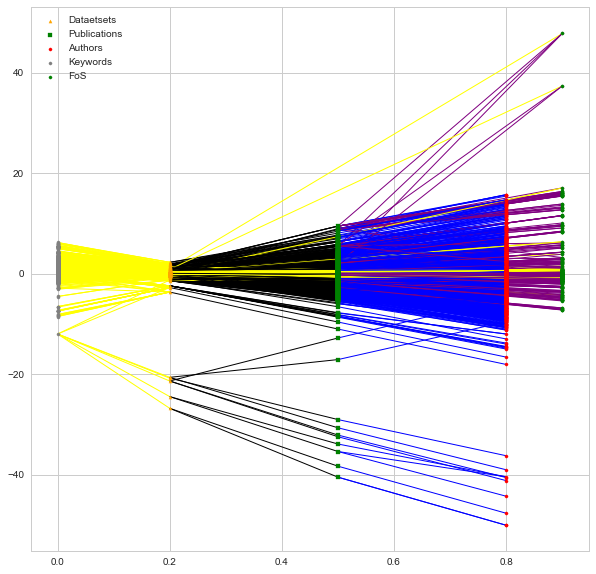

In [156]:
dataset_nodes = set(dataset_pub_visual.data_set_id)
pub_nodes = set(dataset_pub_visual.publication_id)
author_nodes  = set(pub_author_visual.AuthorId)
FoS_nodes = set(Author_pub_data_FoS_visual.NormalizedName)

dataset_nodes_list = list(dataset_nodes)
pub_nodes_list = list(pub_nodes)
author_nodes_list = list(author_nodes)
keywords_nodes_list = list(keywords_nodes)
FoS_nodes_list = list(FoS_nodes)

multiassign_x_y(pos,dataset_nodes_list,[0.2]*len(dataset_nodes_list))
multiassign_x_y(pos,pub_nodes_list,[0.5]*len(pub_nodes_list))
multiassign_x_y(pos,author_nodes_list,[0.8]*len(author_nodes_list))
multiassign_x_y(pos,keywords_nodes_list,[0]*len(keywords_nodes_list))
multiassign_x_y(pos,FoS_nodes_list,[0.9]*len(FoS_nodes_list))



from matplotlib.patches import ConnectionStyle
plt.figure(figsize=(10,10))

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
# weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_networkx_nodes(G, nodelist = dataset_nodes, node_shape = '^', node_color = 'orange',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Dataetsets')
nx.draw_networkx_nodes(G, nodelist = pub_nodes, node_shape = 's', node_color = 'green',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Publications')
nx.draw_networkx_nodes(G, nodelist = author_nodes, node_shape = 'o', node_color = 'red',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Authors')
nx.draw_networkx_nodes(G, nodelist = keywords_nodes, node_shape = 'o', node_color = 'grey',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Keywords')
nx.draw_networkx_nodes(G, nodelist = FoS_nodes_list, node_shape = 'o', node_color = 'green',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'FoS')
# # nx.draw_networkx_labels(nx.Graph(label_pos), pos=label_pos)
nx.draw_networkx_edges(G, pos=pos,edge_color=colors)


plt.legend()

In [113]:
Author_pub_data_FoS_visual.head()

,publication_id,AuthorId,Doi,data_set_id,score,NormalizedName
0,pub_206,2132156010,10.1542/peds.99.4.e1,data_400,1,medicine
1,pub_206,2132156010,10.1542/peds.99.4.e1,data_400,1,diabetes mellitus
2,pub_206,2132156010,10.1542/peds.99.4.e1,data_400,1,overweight
3,pub_206,2132156010,10.1542/peds.99.4.e1,data_400,1,nhanes iii
4,pub_206,2132156010,10.1542/peds.99.4.e1,data_400,1,physical examination


In [133]:
set([v[1] for k,v in pos.items()])

{5636416.0031080246,
 5628160.0147485733,
 -23531135.9167099,
 12436480.075120926,
 -40675157.308578491,
 1782592.0134782791,
 -17290879.786014557,
 1872088.0150794983,
 -25817471.742630005,
 31161600.351333618,
 8925504.2374134064,
 -38373374.938964844,
 5179584.0263366699,
 43413761.258125305,
 -34542846.6796875,
 -24410623.31199646,
 -21511167.287826538,
 -4619231.8201065063,
 -2003152.4822115898,
 2366368.1000471115,
 -21456383.168697357,
 -9115999.9370574951,
 -4898335.7846736908,
 -1102249.3243217468,
 -6163647.7708816528,
 -390711.98552846909,
 -11650111.526250839,
 31457322.835922241,
 -29400447.010993958,
 -1299127.9363632202,
 7509894.6690559387,
 4522976.279258728,
 -13529343.903064728,
 -3717311.8442296982,
 -6459253.2813549042,
 13245120.644569397,
 -9301759.3026161194,
 -50976765.155792236,
 -30257150.530815125,
 -7217087.596654892,
 31501930.952072144,
 -301974.66257959604,
 -15272426.605224609,
 1711936.1087679863,
 9919232.8751087189,
 -262697.9723572731,
 9671296.9243

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [158]:
def plotDegreeDistribution(dataset_degrees, node_type = 'Dataset', ptype = 'density', figsize = (10,8), bins = 50):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10,8))
    if ptype == 'density':
        sns.distplot(dataset_degrees, hist = True, bins = bins)
        plt.ylabel('Density')
        plt.xlabel('Degree')

    if ptype == 'count':
        plt.hist(dataset_degrees, bins = bins)
        plt.ylabel('Count')
        plt.xlabel('Degree')

    if ptype == 'box':
        sns.boxplot(dataset_degrees, orient = 'v')
        plt.ylabel('Degree')

    plt.title('{} Nodes Degree Distribution'.format(node_type))
    plt.show()

In [159]:
dataset_degrees_dict = {}
for dataset in dataset_pub_visual.data_set_id:
    degree = G.degree(dataset)
    dataset_degrees_dict[dataset] = degree

dataset_degrees = [x for x in dataset_degrees_dict.values()]

In [160]:
pub_degrees_dict = {}
for pub in dataset_pub_visual.publication_id:
    degree = G.degree(pub)
    pub_degrees_dict[pub] = degree

pub_degrees = [x for x in pub_degrees_dict.values()]

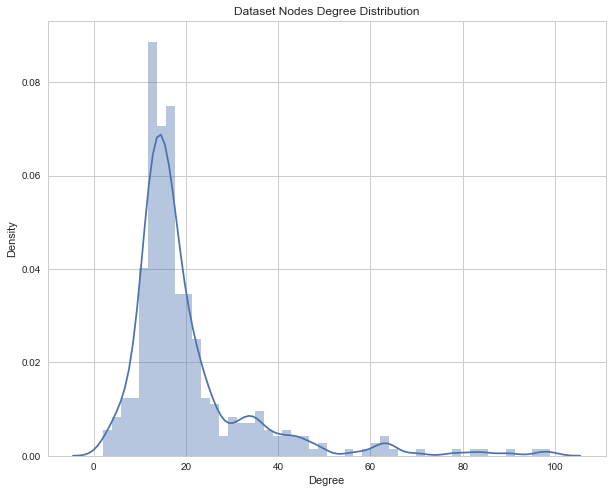

In [161]:
plotDegreeDistribution(dataset_degrees, node_type = 'Dataset', ptype = 'density', figsize = (10,8), bins = 50)




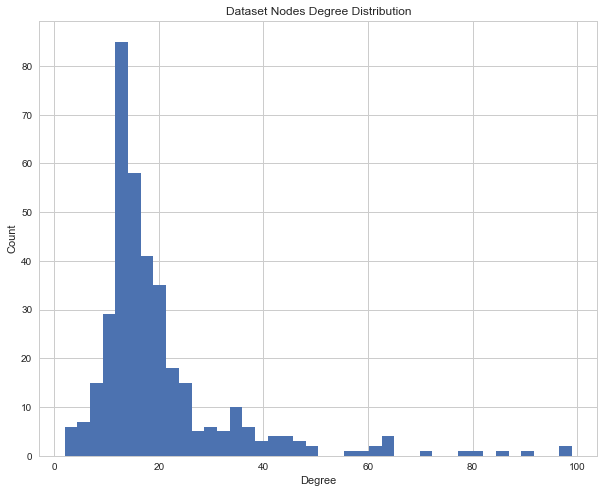

In [162]:
plotDegreeDistribution(dataset_degrees, node_type = 'Dataset', ptype = 'count', figsize = (10,8), bins = 40)

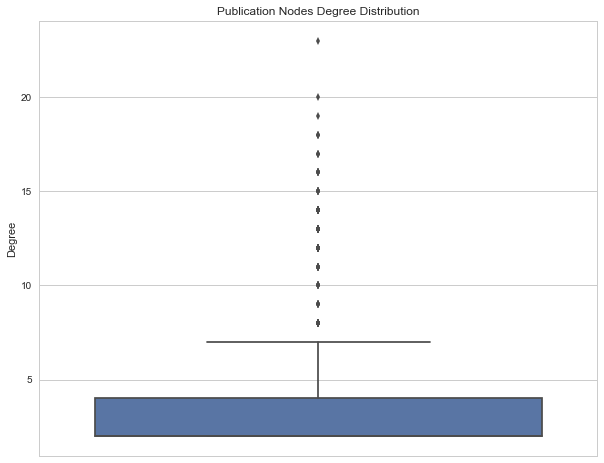

In [163]:
plotDegreeDistribution(pub_degrees, node_type = 'Publication', ptype = 'box', figsize = (10,8), bins = 50)

# Real network

In [180]:
Author_pub_data.shape

(22396, 5)

In [181]:
Author_pub_data_FoS = Author_pub_data.merge(all_FoS,left_on = 'publication_id', right_on = 'publication_id',how = 'inner')

In [182]:
Author_pub_data_FoS.shape

(26810, 6)

In [184]:
Author_pub_data_FoS.head()

,publication_id,AuthorId,Doi,data_set_id,score,NormalizedName
0,pub_166,1980535627,10.1093/geront/36.4.464,data_376,1,medicine
1,pub_166,1980535627,10.1093/geront/36.4.464,data_376,1,gerontology
2,pub_166,1980535627,10.1093/geront/36.4.464,data_376,1,long term care
3,pub_166,1980535627,10.1093/geront/36.4.464,data_376,1,epidemiology
4,pub_166,1980535627,10.1093/geront/36.4.464,data_376,1,population


In [185]:
pub_author = Author_pub_data_FoS[['publication_id','AuthorId']]
dataset_pub = Author_pub_data_FoS[['publication_id','data_set_id']]
pub_RoS = Author_pub_data_FoS[['publication_id','NormalizedName' ]]

In [186]:
pub_author.AuthorId = pub_author.AuthorId.apply(lambda x: "aut_"+str(x))


In [187]:
G_all = nx.Graph()
G_all.add_edges_from(dataset_pub.values.tolist(),color='black')
G_all.add_edges_from(pub_author.values.tolist(),color='blue')
G_all.add_edges_from(pub_RoS.values.tolist(),color='purple')


In [188]:
df_merged2 = dataset_pub.merge(df_description, on = "data_set_id")

df_merged2 = df_merged2[['data_set_id','publication_id','description','subjects']]
df_subjects_all = df_merged2[['data_set_id','subjects']]
df_subjects_all.subjects = df_subjects_all.subjects.apply(lambda x: x.split(','))


In [189]:
subjects_list_all = []
keywords_nodes_all = set()
for idx,subjects in enumerate(df_subjects_all.subjects):
    for i in subjects:
        s = i.split(' ')
        subjects_list_all.append((df_subjects_all.data_set_id[idx], s[0]))
        keywords_nodes_all = keywords_nodes_all|set([s[0]])

G_all.add_edges_from(subjects_list_all,color='yellow')
# pos = nx.spring_layout(G_all)

In [190]:
df_merged2.shape

(26810, 4)

In [169]:
[(i, G_all.degree(i)) for i in G_all.nodes() if str(i).startswith('pub')]

[('pub_1432', 8),
 ('pub_1433', 5),
 ('pub_1430', 2),
 ('pub_1431', 2),
 ('pub_1436', 6),
 ('pub_1437', 7),
 ('pub_1434', 4),
 ('pub_1435', 5),
 ('pub_1438', 6),
 ('pub_1439', 9),
 ('pub_1298', 7),
 ('pub_1299', 4),
 ('pub_1296', 7),
 ('pub_1297', 3),
 ('pub_1294', 8),
 ('pub_1295', 9),
 ('pub_1292', 7),
 ('pub_1291', 7),
 ('pub_2521', 8),
 ('pub_2520', 5),
 ('pub_2523', 5),
 ('pub_2522', 3),
 ('pub_2525', 6),
 ('pub_2526', 7),
 ('pub_2529', 5),
 ('pub_2528', 3),
 ('pub_331', 6),
 ('pub_330', 12),
 ('pub_333', 9),
 ('pub_332', 3),
 ('pub_334', 2),
 ('pub_338', 9),
 ('pub_3049', 4),
 ('pub_3045', 7),
 ('pub_3044', 9),
 ('pub_3047', 7),
 ('pub_3046', 7),
 ('pub_3041', 5),
 ('pub_3040', 7),
 ('pub_3042', 7),
 ('pub_1609', 3),
 ('pub_1608', 11),
 ('pub_1359', 5),
 ('pub_1358', 5),
 ('pub_1357', 3),
 ('pub_1356', 3),
 ('pub_1355', 6),
 ('pub_1354', 4),
 ('pub_1353', 7),
 ('pub_1352', 8),
 ('pub_1351', 5),
 ('pub_1350', 3),
 ('pub_924', 2),
 ('pub_925', 3),
 ('pub_927', 2),
 ('pub_920', 3),


In [170]:
[(i, G_all.degree(i)) for i in G_all.nodes() if str(i).startswith('data')]

[('data_557', 25),
 ('data_556', 26),
 ('data_555', 26),
 ('data_554', 24),
 ('data_553', 23),
 ('data_552', 24),
 ('data_551', 24),
 ('data_550', 18),
 ('data_559', 24),
 ('data_558', 18),
 ('data_1221', 36),
 ('data_1220', 27),
 ('data_1223', 19),
 ('data_1222', 27),
 ('data_1225', 28),
 ('data_1224', 28),
 ('data_1227', 14),
 ('data_1226', 11),
 ('data_1229', 14),
 ('data_1228', 12),
 ('data_782', 15),
 ('data_783', 17),
 ('data_781', 11),
 ('data_784', 16),
 ('data_785', 9),
 ('data_967', 13),
 ('data_788', 10),
 ('data_789', 31),
 ('data_962', 15),
 ('data_963', 13),
 ('data_960', 42),
 ('data_961', 32),
 ('data_1058', 25),
 ('data_1059', 23),
 ('data_1052', 38),
 ('data_1053', 38),
 ('data_1050', 19),
 ('data_1051', 40),
 ('data_1056', 9),
 ('data_1057', 25),
 ('data_1054', 37),
 ('data_1055', 37),
 ('data_579', 21),
 ('data_578', 24),
 ('data_575', 21),
 ('data_574', 20),
 ('data_577', 21),
 ('data_576', 20),
 ('data_571', 10),
 ('data_570', 23),
 ('data_573', 14),
 ('data_572',

In [191]:
dirname = 'data/'
filename = 'doc_sim.csv'

pub_sim = pd.read_csv(dirname+filename)

In [192]:
pub_sim = pub_sim[['Doc1','Doc2','Similarity']]
pub_sim.shape

(12497500, 3)

In [194]:
Author_pub_data_FoS.head()

,publication_id,AuthorId,Doi,data_set_id,score,NormalizedName
0,pub_166,1980535627,10.1093/geront/36.4.464,data_376,1,medicine
1,pub_166,1980535627,10.1093/geront/36.4.464,data_376,1,gerontology
2,pub_166,1980535627,10.1093/geront/36.4.464,data_376,1,long term care
3,pub_166,1980535627,10.1093/geront/36.4.464,data_376,1,epidemiology
4,pub_166,1980535627,10.1093/geront/36.4.464,data_376,1,population


In [195]:
pub_sim_reduced = pub_sim[pub_sim.Similarity >= 0.9]

In [196]:
pub_sim_reduced.head()

,Doc1,Doc2,Similarity
9,pub_3644,pub_3136,0.900262
24,pub_3644,pub_4103,0.901179
27,pub_3644,pub_1090,0.905726
87,pub_3644,pub_5619,0.936328
133,pub_3644,pub_3718,0.907079


In [49]:
dataset_pub_visual.head()

,publication_id,data_set_id
235,pub_206,data_400
12172,pub_1743,data_530
5192,pub_772,data_53
17289,pub_2322,data_608
10955,pub_1616,data_513


In [197]:
G_all.add_weighted_edges_from(pub_sim_reduced.values.tolist(),color='red')

In [198]:
[(i, G_all.degree(i)) for i in G_all.nodes() if str(i).startswith('pub')]

[('pub_1432', 1113),
 ('pub_1433', 1208),
 ('pub_1430', 97),
 ('pub_1431', 252),
 ('pub_1436', 800),
 ('pub_1434', 365),
 ('pub_1435', 89),
 ('pub_1438', 27),
 ('pub_1439', 830),
 ('pub_1437', 1158),
 ('pub_1298', 397),
 ('pub_1299', 88),
 ('pub_1296', 1182),
 ('pub_1297', 411),
 ('pub_1294', 428),
 ('pub_1295', 1127),
 ('pub_1292', 321),
 ('pub_1291', 71),
 ('pub_5665', 337),
 ('pub_5335', 16),
 ('pub_5334', 286),
 ('pub_5337', 94),
 ('pub_5336', 197),
 ('pub_5331', 226),
 ('pub_5330', 243),
 ('pub_5333', 623),
 ('pub_5339', 65),
 ('pub_5338', 805),
 ('pub_2521', 405),
 ('pub_2520', 475),
 ('pub_2522', 111),
 ('pub_2525', 402),
 ('pub_2524', 539),
 ('pub_2529', 740),
 ('pub_2528', 1029),
 ('pub_1995', 188),
 ('pub_5199', 837),
 ('pub_5198', 112),
 ('pub_5191', 52),
 ('pub_5190', 344),
 ('pub_5193', 150),
 ('pub_5192', 1063),
 ('pub_5195', 447),
 ('pub_5197', 343),
 ('pub_4066', 183),
 ('pub_142', 123),
 ('pub_4064', 6),
 ('pub_4065', 250),
 ('pub_4062', 427),
 ('pub_4063', 68),
 ('pub

In [52]:
# pos = nx.spring_layout(G_all)

In [53]:
# from matplotlib.patches import ConnectionStyle
# plt.figure(figsize=(10,10))

# dataset_nodes_all = set(dataset_pub.data_set_id)
# pub_nodes_all = set(dataset_pub.publication_id)
# author_nodes_all = set(pub_author.AuthorId)


# dataset_nodes_list_all = list(dataset_nodes_all)
# pub_nodes_list_all = list(pub_nodes_all)
# author_list_all = list(author_nodes_all)
# keywords_nodes_list_all = list(keywords_nodes_all)

# # multiassign_x_y(pos,dataset_nodes_list_all,[0.2]*len(dataset_nodes_list_all))
# # multiassign_x_y(pos,pub_nodes_list_all,[0.5]*len(pub_nodes_list_all))
# # multiassign_x_y(pos,author_list_all,[0.8]*len(author_list_all))
# # multiassign_x_y(pos,keywords_nodes_list_all,[0]*len(keywords_nodes_list_all))


# edges = G_all.edges()
# colors = [G_all[u][v]['color'] for u,v in edges]
# # weights = [G[u][v]['weight'] for u,v in edges]


# nx.draw_networkx_nodes(G_all, nodelist = dataset_nodes_all, node_shape = '^', node_color = 'orange',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Dataetsets')
# nx.draw_networkx_nodes(G_all, nodelist = pub_nodes_all, node_shape = 's', node_color = 'green',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Publications')
# nx.draw_networkx_nodes(G_all, nodelist = author_nodes_all, node_shape = 'o', node_color = 'red',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Authors')
# nx.draw_networkx_nodes(G_all, nodelist = keywords_nodes_all, node_shape = '*', node_color = 'grey',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Keywords')
# # # nx.draw_networkx_labels(nx.Graph(label_pos), pos=label_pos)
# nx.draw_networkx_edges(G_all, pos=pos,edge_color=colors)


# plt.legend()

In [199]:
import pickle

In [200]:
with open('network_graph.pickle', 'wb') as handle:
    pickle.dump(G_all, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [201]:
nx.write_gpickle(G_all,"network_all.gpickle")

In [203]:
from networkx.readwrite import json_graph
# G = nx.Graph([('A', 'B')])
# network_json = json_graph.node_link_graph(G_all)
# H = nx.gn_graph(2)
# data2 = json_graph.node_link_data(H, {'link': 'edges', 'source': 'from', 'target': 'to'})

In [ ]:
network_json

In [ ]:
def read_json_graph(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

In [ ]:
[(i, GGG.degree(i)) for i in GGG.nodes() if str(i).startswith('pub')]

In [ ]:
GGG = read_json_graph('network_json.json')


In [204]:
import json
network_json = json_graph.node_link_data(G_all)
json.dump(network_json, open('network_json.json', 'w'), indent=2)